In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clean Data

In [2]:
df = pd.read_json('dataset/yelp_academic_dataset_business.json',encoding='utf-8', lines=True)
df.to_csv("yelp_business.csv", encoding='utf-8' , index=False)

In [2]:
df = pd.read_csv("yelp_business.csv")
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:

## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us = df.loc[df['state'].isin(states)]
us.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
# Filter restaurants with 'Restaurants' in categories
us_restaurants = us[us['categories'].fillna('').str.contains('Restaurants')].copy()

# Initialize the 'category' column
us_restaurants['category'] = None

# Assign categories based on the content of the 'categories' column
categories = ['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 
              'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle_eastern']

for category in categories:
    us_restaurants.loc[us_restaurants['categories'].str.contains(category, na=False), 'category'] = category

# Display the first 20 entries of the 'category' column
us_restaurants['category'].head(20)


3           None
5           None
8          Greek
9           None
11    Vietnamese
12      American
14       Italian
15      Japanese
19        Korean
22          None
23       Italian
24          None
27      Japanese
28       Italian
29          None
31          None
33          None
35      American
36          None
41       Italian
Name: category, dtype: object

In [5]:
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])
del us_restaurants['categories']
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,hours,category
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...",NaN,Greek
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",Vietnamese
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",American
3,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",Italian
4,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",Japanese
5,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",Korean
6,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Italian
7,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2...",Japanese
8,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",Italian
9,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...",American


In [6]:
us_restaurants.shape

(28450, 14)

In [7]:
us_restaurants.business_id.duplicated().sum() # check duplicate rows. If 0 there are no duplicates row


0

In [8]:
us_restaurants.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
hours            object
category         object
dtype: object

In [10]:
df = pd.read_json('dataset/yelp_academic_dataset_review.json',encoding='utf-8', lines=True)
df.to_csv("yelp_review.csv", encoding='utf-8' , index=False)

In [9]:
df = pd.read_csv('yelp_review.csv')
df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [10]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

# Merge two datasets:

In [11]:
restaurants_review = pd.merge(us_restaurants,df,on='business_id')


In [12]:
restaurants_review.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)
restaurants_review['num_words_review'] = restaurants_review.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))


In [13]:
restaurants_review['label'] = ''
restaurants_review.loc[restaurants_review.review_star >= 4, 'label'] = 'positive'
restaurants_review.loc[restaurants_review.review_star == 3, 'label'] = 'neural'
restaurants_review.loc[restaurants_review.review_star < 3, 'label'] = 'negative'
# drop neutral reviews for easy analysis
restaurants_review.drop(restaurants_review[restaurants_review['label'] =='neural'].index, axis=0, inplace=True)
restaurants_review.reset_index(drop=True, inplace=True)

restaurants_review.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,avg_star,review_count,...,review_id,user_id,review_star,useful,funny,cool,text,date,num_words_review,label
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,9fmAJ76g2-CKbbU14Ai1aw,LNprC9Mi8Xqtgk1KCFlKAg,4,0,0,0,"I like Tsevis because they have good gyros, wh...",2014-02-25 22:34:59,53,positive
1,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,OCmjANuYad62GAyY0NI8bQ,z-i_Qv-E3qeHfdPZddpwYQ,4,0,0,0,Good Greek American food. I highly recomend th...,2013-01-29 04:27:04,26,positive
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,QPZ66Xk54CprqZgTW1QTdQ,m6YhwUNoehMm6s52w9A4eA,2,0,0,0,Wife and I have eaten lunch here a few times o...,2013-10-25 15:39:01,184,negative
3,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,yUpKEiSWjcix-zWHFMT39w,-YAnRx8VSDkASxlylv3dyg,1,0,0,0,After about 7 minutes of waiting patiently for...,2014-07-16 19:17:34,189,negative
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,JR0MWE4psJqD2MyHbMckxA,WJ-veSDe63t0HnCu2E1NSA,1,3,0,0,Three of us decided to try this place out last...,2012-12-17 18:37:23,224,negative


# Exploratory Data Analysis


## Distribution of restaurants

In [14]:
plt.style.use('ggplot')

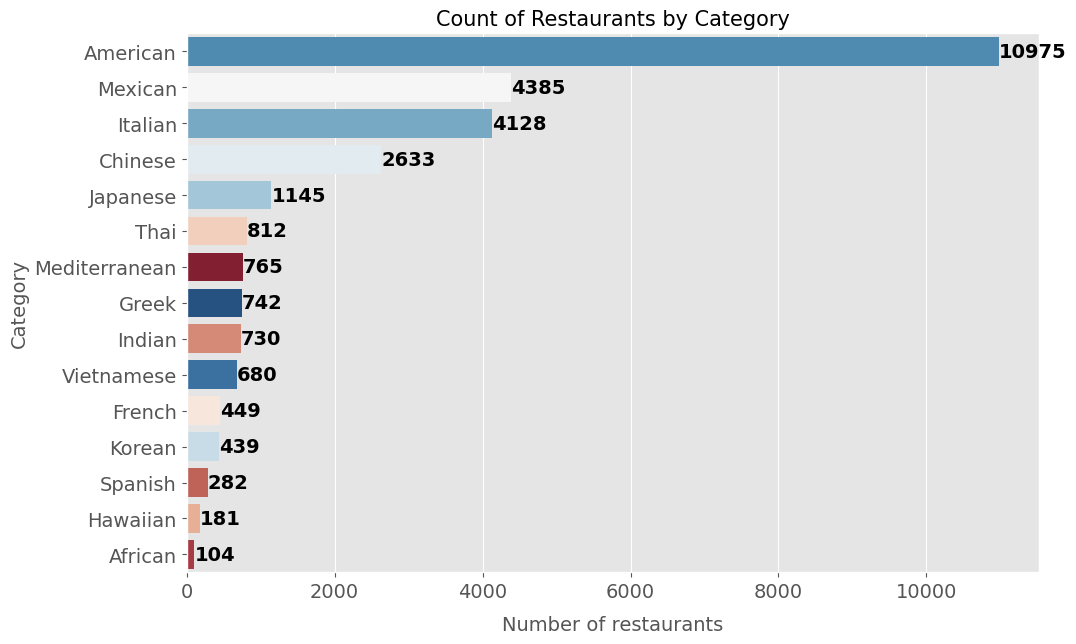

In [19]:
plt.figure(figsize=(11, 7))

# Group the categories by their count
grouped = us_restaurants['category'].value_counts()

# Create the count plot
sns.countplot(y='category', data=us_restaurants, 
              order=grouped.index, hue='category', palette=sns.color_palette("RdBu_r", len(grouped)), legend=False)

# Set labels and title
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)

# Add text labels
for i, v in enumerate(grouped):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14, va='center')

plt.show()

10 cities with most restaurants


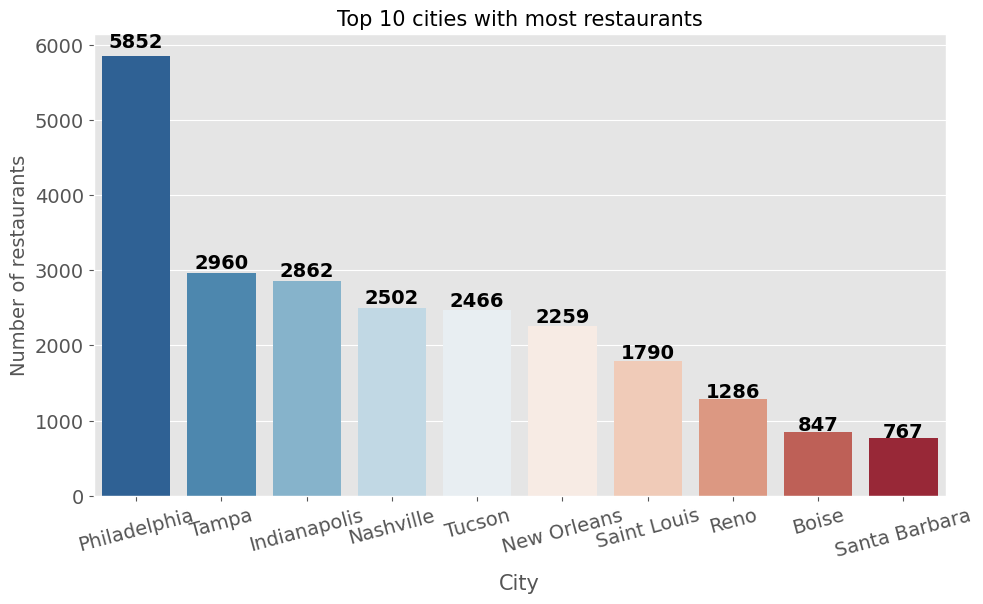

In [32]:
plt.figure(figsize=(11, 6))
grouped = us_restaurants['city'].value_counts()[:10]
sns.barplot(x=grouped.index, y=grouped.values, hue=grouped.index, dodge=False, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('City', fontsize=15, labelpad=10)
plt.ylabel('Number of restaurants', fontsize=14)
plt.title('Top 10 cities with most restaurants', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

for i, v in enumerate(grouped.values):
    plt.text(i, v*1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

plt.show()


Distribution of restaurants in each state


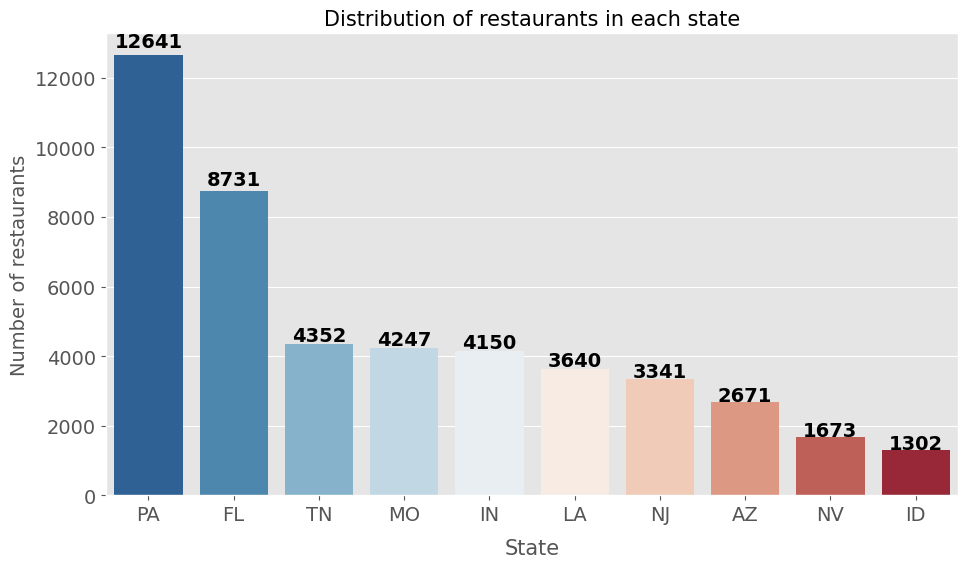

In [35]:
plt.figure(figsize=(11, 6))
grouped = us_restaurants['state'].value_counts()[:10]
sns.barplot(x=grouped.index, y=grouped.values, hue=grouped.index, dodge=False, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('State', fontsize=15, labelpad=10)
plt.ylabel('Number of restaurants', fontsize=14)
plt.title('Distribution of restaurants in each state', fontsize=15)
plt.tick_params(labelsize=14)

for i, v in enumerate(grouped.values):
    plt.text(i, v*1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

plt.show()


Distribution of reviews by cuisine type


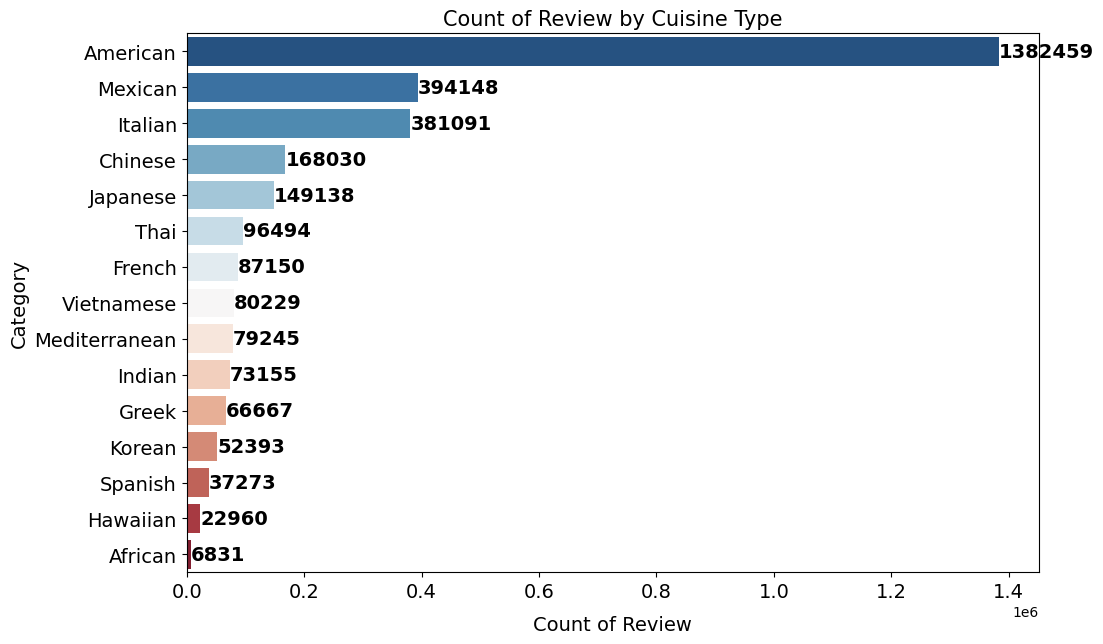

In [24]:
plt.figure(figsize=(11, 7))

# Group by category and sum the review counts, then sort in descending order
grouped = us_restaurants.groupby('category')['review_count'].sum().sort_values(ascending=False)

# Create the bar plot
sns.barplot(y=grouped.index, x=grouped.values, hue=grouped.index, dodge=False, palette=sns.color_palette("RdBu_r", len(grouped)))

# Set labels and title
plt.xlabel('Count of Review', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Review by Cuisine Type', fontsize=15)
plt.tick_params(labelsize=14)

# Add text labels
for i, v in enumerate(grouped.values):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14, va='center')

# Hide the legend
plt.legend([], [], frameon=False)

# Show the plot
plt.show()

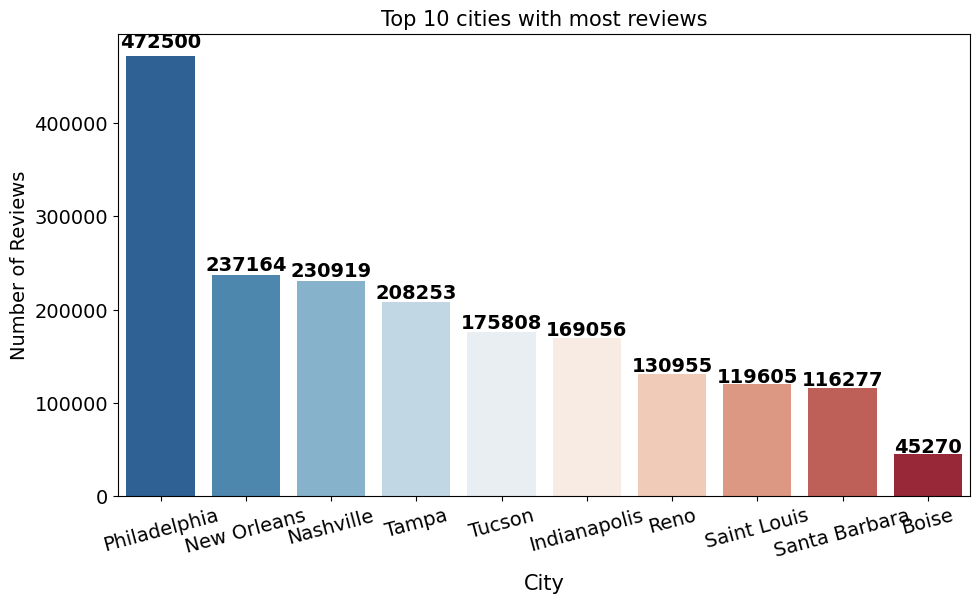

In [22]:
plt.figure(figsize=(11, 6))
grouped = us_restaurants.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=grouped.index, y=grouped.values, hue=grouped.index, dodge=False, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('City', fontsize=15, labelpad=10)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Top 10 cities with most reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

for i, v in enumerate(grouped.values):
    plt.text(i, v*1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

plt.show()

Distribution of reviews in each state


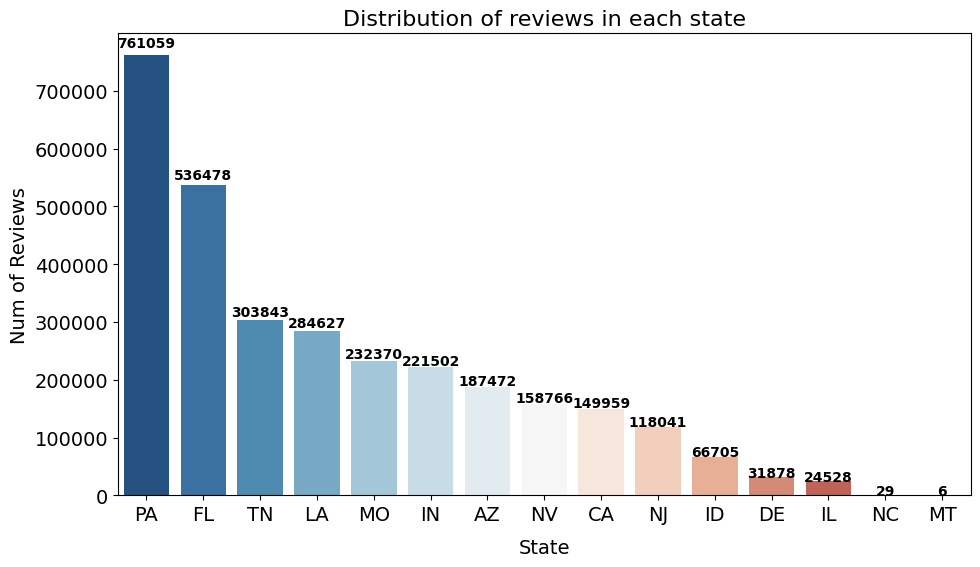

In [17]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.groupby('state')['review_count'].sum().sort_values(ascending=False)
sns.barplot(y=grouped.values, x=grouped.index, hue=grouped.index, dodge=False, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('State', fontsize=14, labelpad=10)
plt.ylabel('Num of Reviews', fontsize=14)
plt.title('Distribution of reviews in each state', fontsize=16)
plt.tick_params(labelsize=14)
for i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=10 )
plt.show()

Top 9 restaurants with most reviews

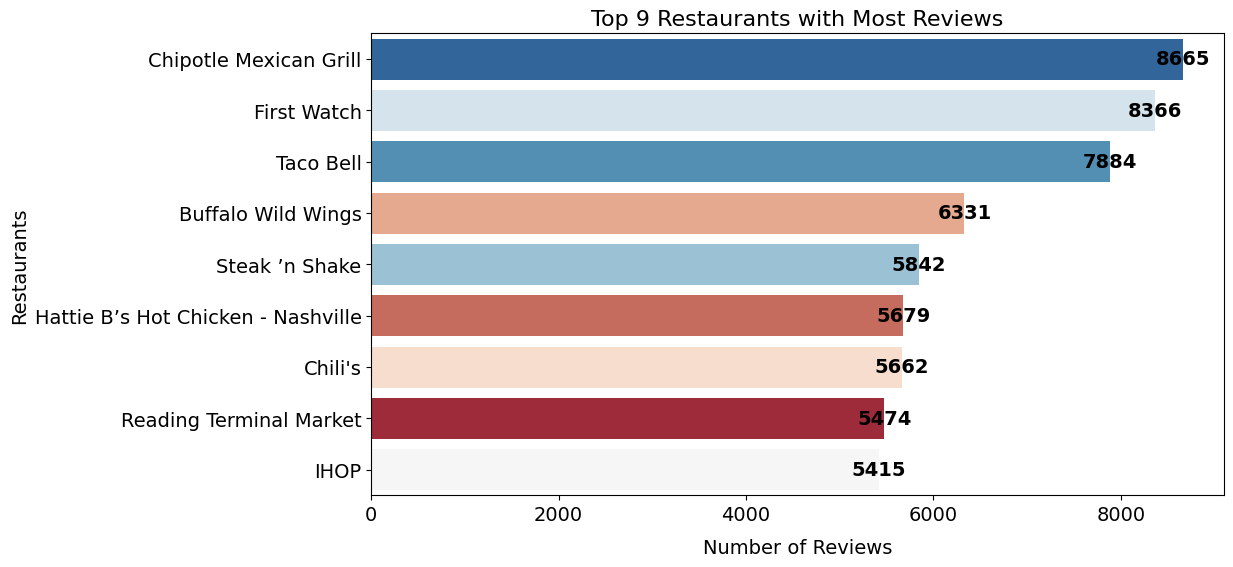

In [30]:
plt.figure(figsize=(11, 6))

# Filter the top 9 restaurants with the most reviews
top_restaurants = restaurants_review['name'].value_counts().nlargest(9).index
top_reviews = restaurants_review[restaurants_review['name'].isin(top_restaurants)]

# Create the count plot
sns.countplot(y='name', data=top_reviews,hue='name', order=top_restaurants, palette=sns.color_palette("RdBu_r", 9))

# Set labels and title
plt.xlabel('Number of Reviews', fontsize=14, labelpad=10)
plt.ylabel('Restaurants', fontsize=14)
plt.title('Top 9 Restaurants with Most Reviews', fontsize=16)
plt.tick_params(labelsize=14)

# Add text labels
counts = top_reviews['name'].value_counts().loc[top_restaurants]
for i, v in enumerate(counts):
    plt.text(v, i, str(v), horizontalalignment='center', fontweight='bold', fontsize=14, va='center')

# Hide the legend
plt.legend([], [], frameon=False)

# Show the plot
plt.show()


Distribution of positive and negative reviews in each category


In [17]:
table = pd.pivot_table(restaurants_review, values=["review_id"], index=["category"],columns=["label"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
table

review_id                  
label          negative positive      All
category                                 
African            1441     4824     6265
American         304857   946939  1251796
Chinese           42450   111264   153714
French            13051    66875    79926
Greek             11479    50471    61950
Hawaiian           3153    18311    21464
Indian            12535    56515    69050
Italian           87415   265360   352775
Japanese          29652   107180   136832
Korean             7800    40466    48266
Mediterranean     11833    62551    74384
Mexican           90754   271549   362303
Spanish            5900    28534    34434
Thai              15742    74126    89868
Vietnamese        12863    61345    74208
All              650925  2166310  2817235

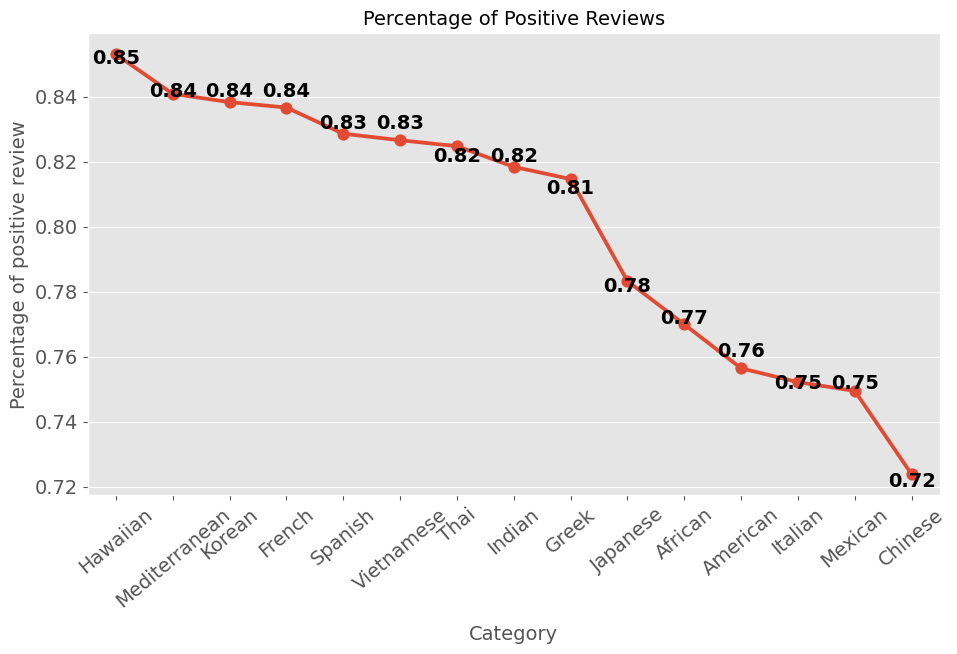

In [21]:
plt.figure(figsize=(11,6))
sns.pointplot(x=table_percentage.index, y=table_percentage.values)
plt.xlabel('Category',fontsize=14, labelpad=10)
plt.ylabel('Percentage of positive review', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for i,v in enumerate(table_percentage.round(2)):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
plt.show()

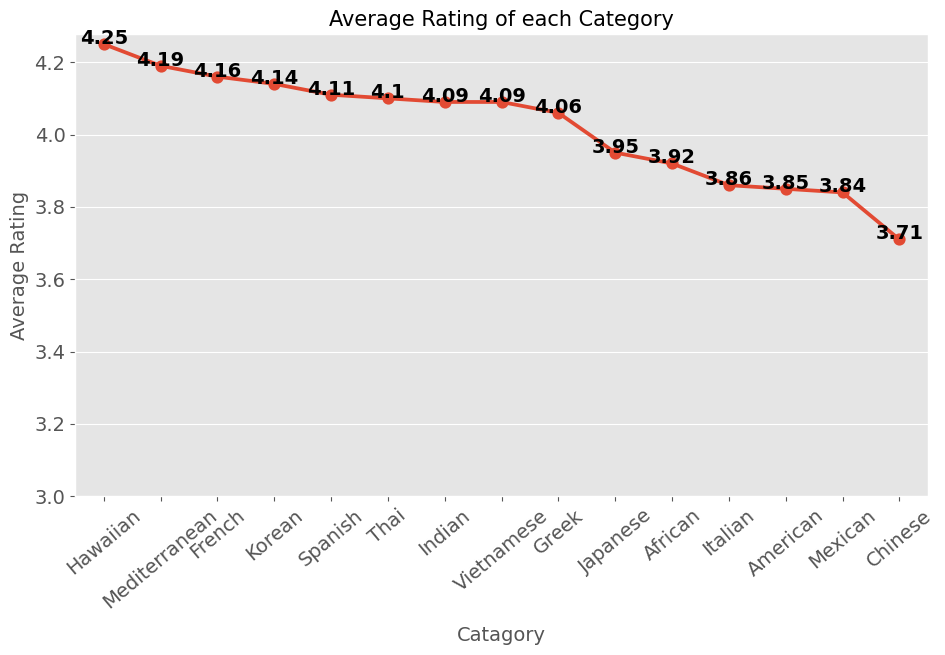

In [23]:
plt.figure(figsize=(11,6))
grouped = restaurants_review.groupby('category')['review_star'].mean().round(2).sort_values(ascending=False)
sns.pointplot(x=grouped.index, y=grouped.values)
plt.ylim(3)
plt.xlabel('Catagory', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplots_adjust(hspace=1)

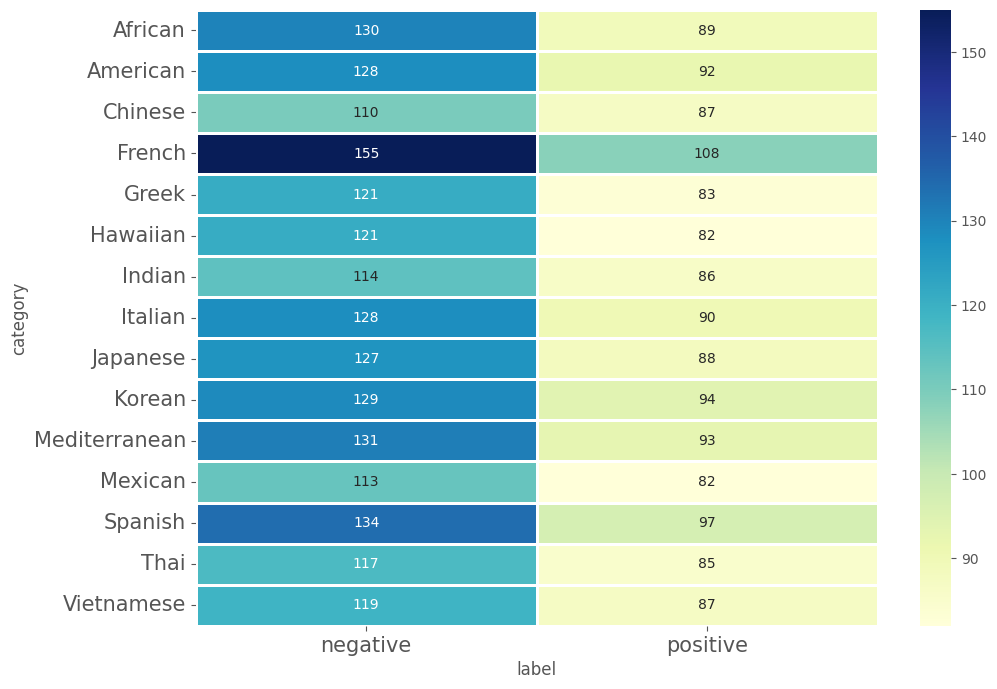

In [26]:
table = restaurants_review.groupby(['category','label'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(table, cmap='YlGnBu', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=15)

## Rating Distribution

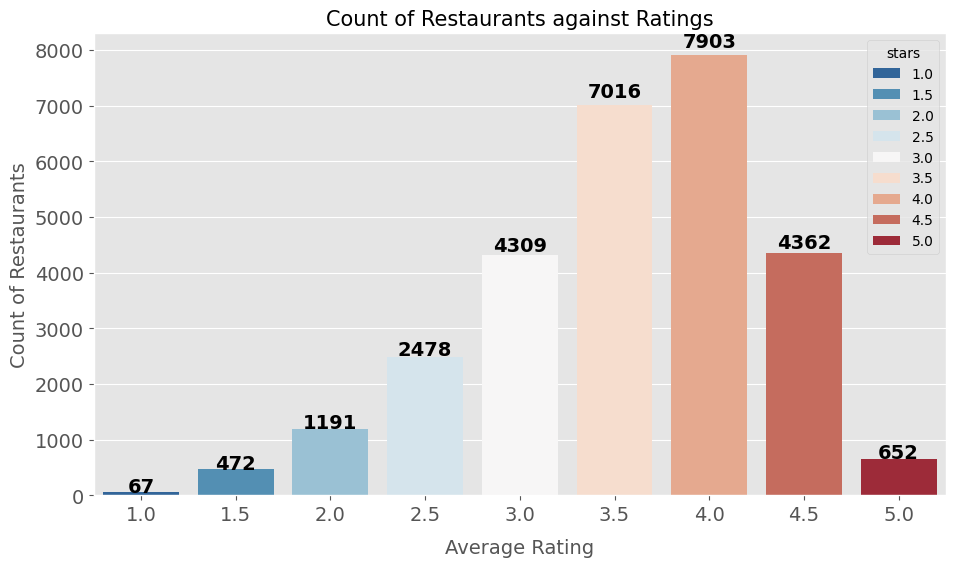

In [30]:
plt.figure(figsize=(11, 6))

# Get the count of restaurants for each star rating
grouped = us_restaurants.stars.value_counts().sort_index()

# Create the bar plot
sns.barplot(x=grouped.index, y=grouped.values, hue=grouped.index, palette=sns.color_palette("RdBu_r", len(grouped)))

# Set labels and title
plt.xlabel('Average Rating', fontsize=14, labelpad=10)
plt.ylabel('Count of Restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)

# Add text labels
for i, v in enumerate(grouped.values):
    plt.text(i, v * 1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

# Show the plot
plt.show()

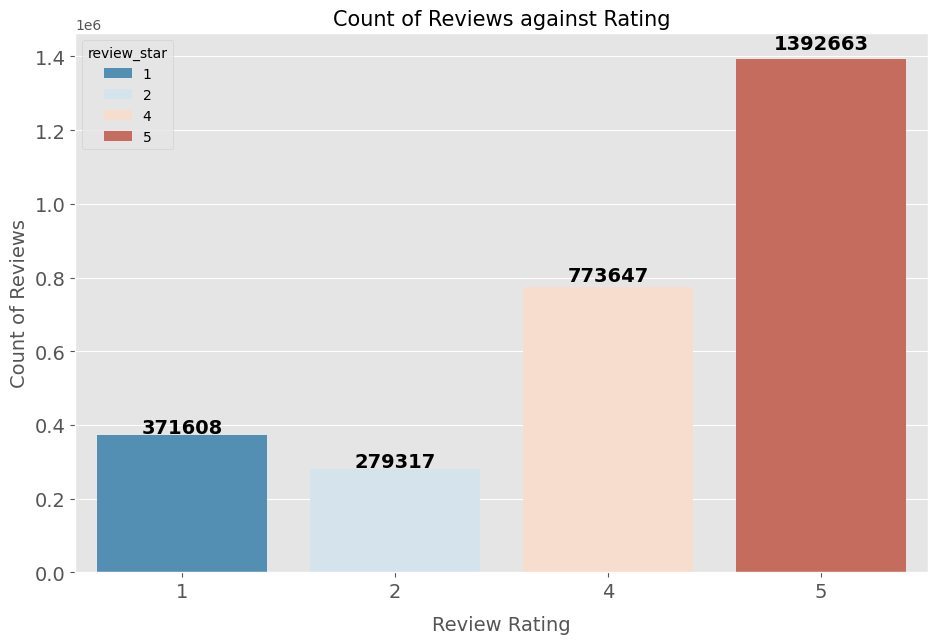

In [32]:

plt.figure(figsize=(11, 7))

# Get the count of reviews for each star rating
grouped = restaurants_review.review_star.value_counts().sort_index()

# Create the bar plot
sns.barplot(x=grouped.index, y=grouped.values, hue=grouped.index, palette=sns.color_palette("RdBu_r", len(grouped)))

# Set labels and title
plt.xlabel('Review Rating', fontsize=14, labelpad=10)
plt.ylabel('Count of Reviews', fontsize=14)
plt.title('Count of Reviews against Rating', fontsize=15)
plt.tick_params(labelsize=14)

# Add text labels
for i, v in enumerate(grouped.values):
    plt.text(i, v * 1.02, str(v), horizontalalignment='center', fontweight='bold', fontsize=14)

# Show the plot
plt.show()

# Review Analysis